In [35]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
import Polygons_From_Groups_Function as pol
import rasterio

In [66]:
import importlib
importlib.reload(pol)

<module 'Polygons_From_Groups_Function' from 'C:\\Users\\lucas\\Documents\\Politecnico di Milano\\Geospatial Processing\\Project\\GeospatialProject\\Polygons_From_Groups_Function.py'>

In [76]:
INPUT_RASTER_PATH = "Data/Grouped_Clipped_LC_Belgium_2022.tif"
TARGET_GROUP = 16
OUTPUT_GEOJSON_PATH = "THE_CREATED_POLYGONS/OUTPUT_RASTER.geojson"

In [77]:
# Create the polygon. This step might take up to a few minutes, depending on the size of the chosen group
polygon, polygon_size = pol.raster_group_to_polygon(INPUT_RASTER_PATH, TARGET_GROUP)
print("Polygon created")

Polygon created


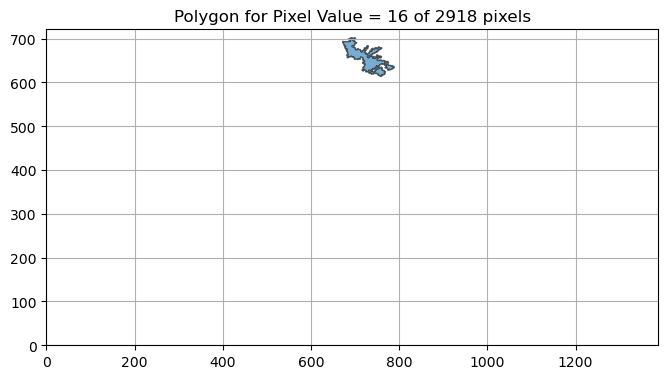

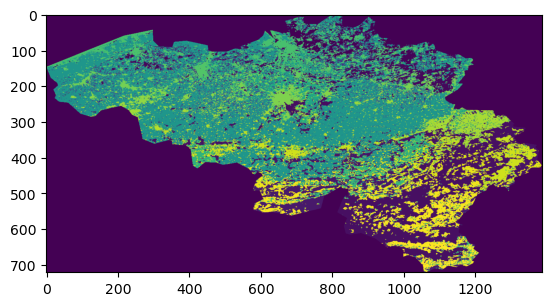

In [82]:
# Plot the polygon

# Get raster length and width
with rasterio.open(INPUT_RASTER_PATH) as src:
    data = src.read(1)
    y_length, x_length = src.shape

plt.figure(figsize=(12*x_length/(x_length+y_length), 12*y_length/(x_length+y_length))) # Set figure size based on raster shape

x, y = polygon.exterior.xy
plt.fill(x, y, alpha=0.6, edgecolor="black")

plt.title(f"Polygon for Pixel Value = {TARGET_GROUP} of {polygon_size} pixels")
plt.axis([0, x_length, 0, y_length])
plt.grid(True)
plt.show()

plt.imshow(data)
plt.show()

In [81]:
# Save the polygon as GeoJSON
save_polygon_geojson(polygon, OUTPUT_GEOJSON_PATH, TARGET_GROUP)
print("GeoJSON saved")

GeoJSON saved
